# Imports

In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
plt.style.use("ggplot")
sns.set_context("paper")

# Concat individual video data

In [3]:
data_path = Path("analyses", "biotine_full")

In [4]:
all_csv_files = [f for f in data_path.rglob("*.csv") if f.stem != "Experiment"]
print(f"Found {len(all_csv_files)} csv files")

Found 480 csv files


##  Add identifiers to know from which csv file the data comes from

In [5]:
all_smol_dfs = []


def process_file(f: Path):
    smol_df = pd.read_csv(f)
    smol_df["file"] = f.stem
    return smol_df


with ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(process_file, all_csv_files), total=len(all_csv_files)))

all_smol_dfs.extend(results)

  0%|          | 0/480 [00:00<?, ?it/s]

## Concat data

In [6]:
df = pd.concat(all_smol_dfs, ignore_index=True)
df

,ImageNumber,ObjectNumber,FileName_images,PathName_images,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,...,TrackObjects_DistanceTraveled_10,TrackObjects_FinalAge_10,TrackObjects_IntegratedDistance_10,TrackObjects_Label_10,TrackObjects_Lifetime_10,TrackObjects_Linearity_10,TrackObjects_ParentImageNumber_10,TrackObjects_ParentObjectNumber_10,TrackObjects_TrajectoryX_10,TrackObjects_TrajectoryY_10
0,184,1.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1492.0,1920.0,809.0,88.0,769.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,184,2.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1433.0,1849.0,739.0,79.0,696.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,184,3.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1478.0,1900.0,843.0,76.0,805.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,184,4.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1269.0,1628.0,1401.0,77.0,1357.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,184,5.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,510.0,744.0,345.0,86.0,321.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223302,2273,431.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,2531.0,6106.0,1039.0,2010.0,953.0,1939.0,...,3.227833,19.0,195.698088,418.0,19.0,0.318919,2272.0,433.0,2.729040,1.723730
3223303,2273,432.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,3217.0,4588.0,1642.0,2014.0,1568.0,1952.0,...,0.265951,19.0,73.225104,419.0,19.0,0.836119,2272.0,434.0,0.261275,0.049648
3223304,2273,433.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,3316.0,5550.0,1959.0,2030.0,1884.0,1956.0,...,0.000000,1.0,0.000000,480.0,1.0,NaN,0.0,0.0,0.000000,0.000000
3223305,2273,434.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,3499.0,8976.0,989.0,2035.0,901.0,1933.0,...,1.975415,19.0,183.112359,407.0,19.0,0.608849,2272.0,435.0,-0.162668,1.968707


## Add the video ID & time to all rows

(it's only in the "Image" csv for now)

### Add the video ID

In [7]:
df["Metadata_VideoID"].value_counts(dropna=False)

Metadata_VideoID
NaN           3221034
H_13_fld_2         19
L_13_fld_1         19
K_14_fld_4         19
K_14_fld_3         19
               ...   
E_13_fld_3         19
E_13_fld_2         19
E_13_fld_1         19
O_14_fld_4         19
A_13_fld_1         12
Name: count, Length: 121, dtype: int64

In [8]:
mask = df["Metadata_VideoID"].isna()
df.loc[mask, "Metadata_VideoID"] = df["FileName_images"].str.split("_time_").str[0]

In [9]:
df["Metadata_VideoID"].value_counts(dropna=False)

Metadata_VideoID
B_14_fld_2    36160
G_13_fld_2    34133
E_14_fld_2    34022
B_13_fld_2    33901
F_14_fld_2    33702
              ...  
G_13_fld_3    17795
E_13_fld_3    17603
D_14_fld_3    16833
A_14_fld_3    15611
A_13_fld_3    13370
Name: count, Length: 120, dtype: int64

### Add the time

In [10]:
df["Metadata_time"].value_counts(dropna=False)

Metadata_time
NaN     3221034
1.0         120
18.0        120
17.0        120
16.0        120
15.0        120
14.0        120
11.0        120
19.0        120
7.0         120
6.0         120
4.0         120
2.0         120
9.0         119
8.0         119
12.0        119
13.0        119
5.0         119
3.0         119
10.0        119
Name: count, dtype: int64

In [11]:
mask = df["Metadata_time"].isna()
df.loc[mask, "Metadata_time"] = (
    df["FileName_images"].str.extract(r"_time_(.*?)\.")[0].astype(df["Metadata_time"].dtype)
)

In [12]:
df["Metadata_time"].value_counts(dropna=False)

Metadata_time
19.0    172532
17.0    172216
18.0    172214
15.0    171716
16.0    171647
14.0    171608
11.0    170808
7.0     169675
13.0    169656
6.0     169115
12.0    169100
8.0     168929
10.0    168928
9.0     168823
4.0     168175
2.0     167887
1.0     167856
5.0     166524
3.0     165898
Name: count, dtype: int64

# Basic analysis & statistics

In [13]:
list(df.columns)

['ImageNumber',
 'ObjectNumber',
 'FileName_images',
 'PathName_images',
 'AreaShape_Area',
 'AreaShape_BoundingBoxArea',
 'AreaShape_BoundingBoxMaximum_X',
 'AreaShape_BoundingBoxMaximum_Y',
 'AreaShape_BoundingBoxMinimum_X',
 'AreaShape_BoundingBoxMinimum_Y',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_ConvexArea',
 'AreaShape_Eccentricity',
 'AreaShape_EquivalentDiameter',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',


In [14]:
# 119 full videos and one with 7 filtered frames
assert (nb_imgs := len(df["ImageNumber"].unique())) == (theory := 19 * 119 + 12), (
    f"{nb_imgs} != {theory}"
)

In [15]:
df["file"].value_counts(dropna=False)

file
cell_nucleus      1088972
FilteredNuclei    1066031
whole_cell        1066031
Image                2273
Name: count, dtype: int64

## Lifetime of objects

In [16]:
df["TrackObjects_Lifetime_10"].value_counts(dropna=False).sort_index()

TrackObjects_Lifetime_10
1.0       61392
2.0       59330
3.0       58268
4.0       57733
5.0       57218
6.0       56895
7.0       56697
8.0       56557
9.0       56216
10.0      55912
11.0      55690
12.0      55431
13.0      54740
14.0      54563
15.0      54253
16.0      54024
17.0      53959
18.0      53700
19.0      53453
NaN     2157276
Name: count, dtype: int64

In [17]:
df["TrackObjects_FinalAge_10"].value_counts(dropna=False).sort_index()

TrackObjects_FinalAge_10
1.0        4520
2.0        1960
3.0        1321
4.0        1009
5.0         818
6.0         629
7.0         606
8.0         587
9.0         609
10.0        560
11.0        561
12.0       1043
13.0        484
14.0        490
15.0        445
16.0        460
17.0        425
18.0        497
19.0      53453
NaN     3152830
Name: count, dtype: int64

# Select objects with full lifetime 

(ie final age 19)

## First assign a global object ID

### ObjectNumber analysis 

(not an actual object identifier) as not coherent through time)

In [18]:
assert not df["Metadata_VideoID"].isna().any()
print(df["ObjectNumber"].isna().sum())  # these are image files, it's ok
df[df["ObjectNumber"].isna()]["file"]

2273


6451       Image
6452       Image
6453       Image
6454       Image
6455       Image
           ...  
3206525    Image
3206526    Image
3206527    Image
3206528    Image
3206529    Image
Name: file, Length: 2273, dtype: object

In [19]:
df["local_object_id"] = df["Metadata_VideoID"].astype(str) + "-" + df["ObjectNumber"].astype(str)
assert not df["local_object_id"].isna().any()
df["local_object_id"].value_counts(dropna=False)

local_object_id
B_13_fld_3-1.0      57
J_14_fld_3-238.0    57
J_14_fld_3-227.0    57
J_14_fld_3-228.0    57
J_14_fld_3-229.0    57
                    ..
H_13_fld_4-459.0     1
C_14_fld_4-540.0     1
L_14_fld_2-535.0     1
L_14_fld_2-534.0     1
O_14_fld_4-455.0     1
Name: count, Length: 59171, dtype: int64

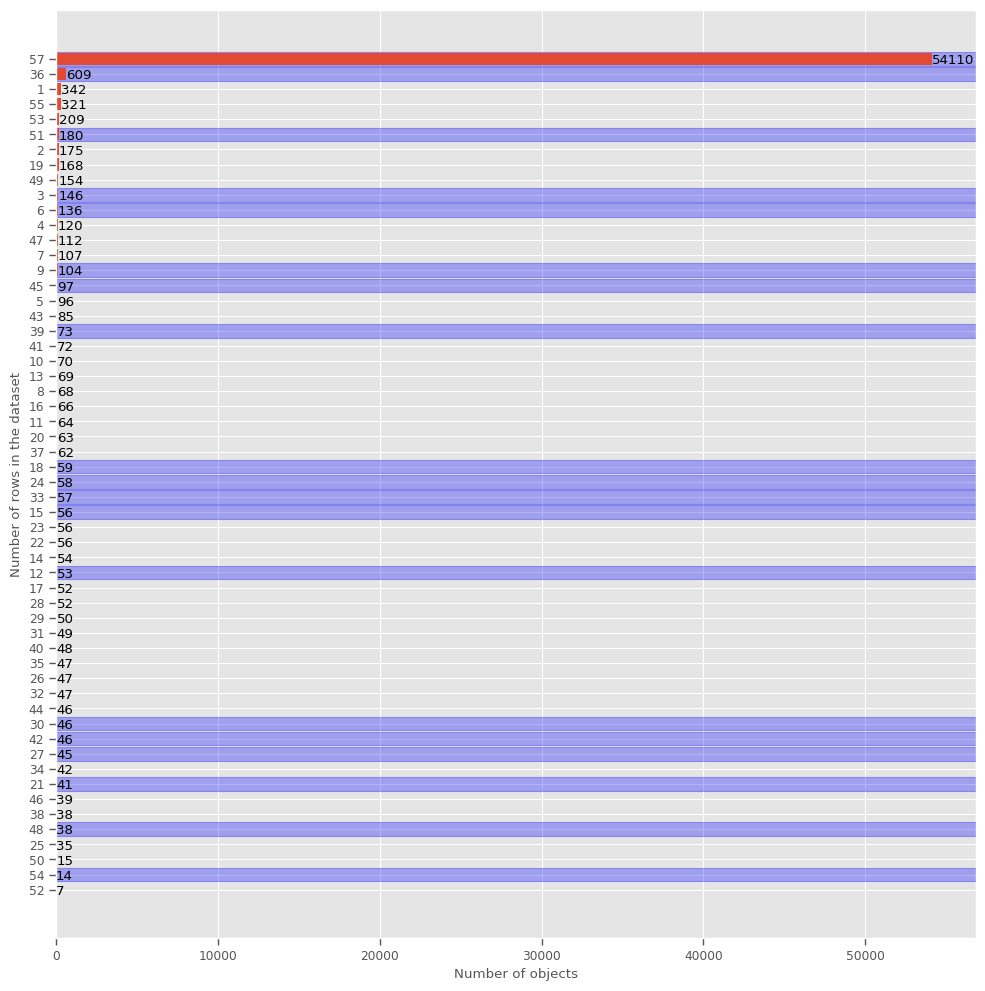

In [20]:
plt.figure(figsize=(10, 10))
x, y = np.unique(df["local_object_id"].value_counts(dropna=False).values, return_counts=True)
sorted_indices = np.argsort(y)
y = y[sorted_indices]
x = x[sorted_indices]
plt.yticks(ticks=np.arange(len(x)), labels=x)
for i in range(3, len(x) + 3, 3):
    actual_y = np.where(x == i)[0][0]
    plt.axhspan(actual_y - 1 / 2 + 5e-2, actual_y + 1 / 2 - 5e-2, color="blue", alpha=0.3)
bars = plt.barh(np.arange(len(x)), y)
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2 - 0.1,
        bar.get_width(),
        va="center",
    )
plt.xlabel("Number of objects")
plt.ylabel("Number of rows in the dataset")
plt.tight_layout()
# plt.xscale("log")
plt.show()

### TrackObjects_Label_10 analysis

In [21]:
maks_trackobject_label_exists = df["TrackObjects_Label_10"].notna()
df.loc[maks_trackobject_label_exists, "global_object_id"] = (
    df["Metadata_VideoID"].astype(str) + "-" + df["TrackObjects_Label_10"].astype(str)
)
df["global_object_id"].value_counts(dropna=False)

global_object_id
NaN                 2157276
M_13_fld_2-167.0         89
O_14_fld_3-21.0          82
N_13_fld_3-298.0         80
K_14_fld_1-14.0          77
                     ...   
H_14_fld_4-502.0          1
D_14_fld_1-545.0          1
L_13_fld_2-512.0          1
D_14_fld_1-544.0          1
O_14_fld_4-481.0          1
Name: count, Length: 61393, dtype: int64

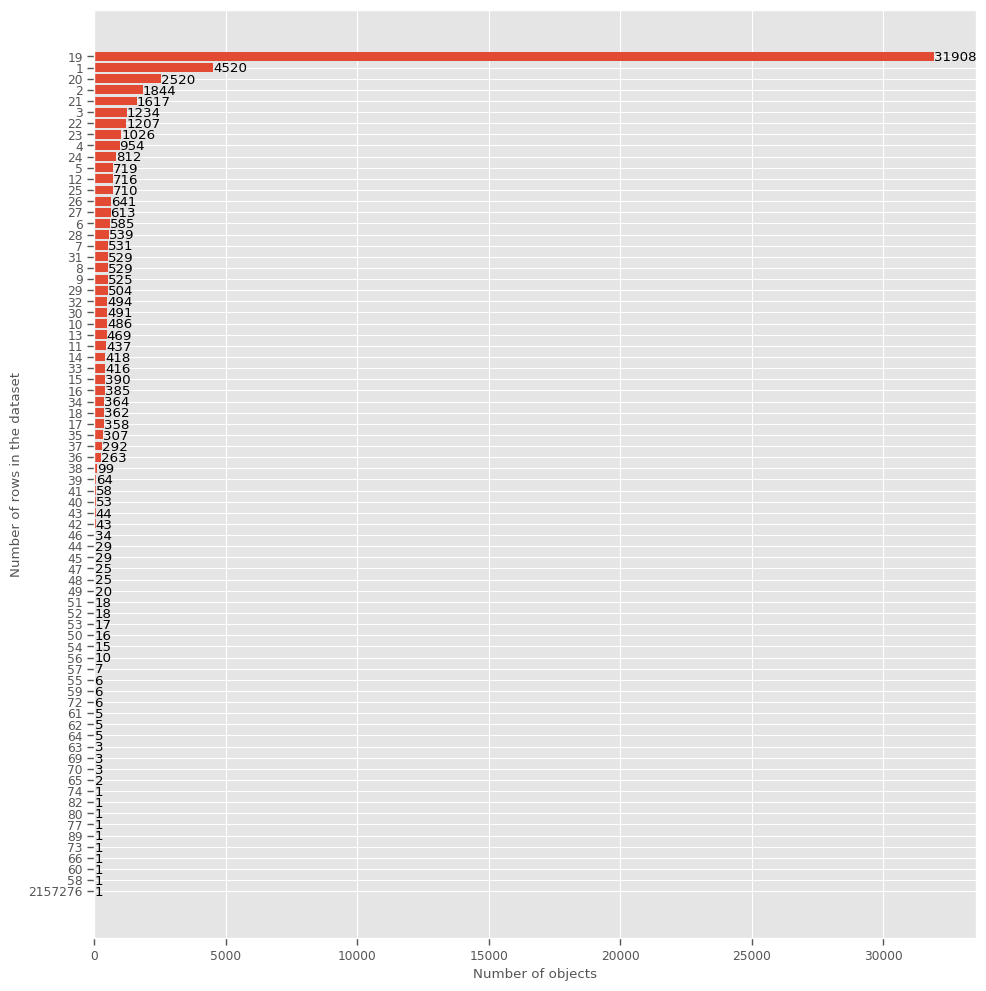

In [22]:
plt.figure(figsize=(10, 10))
x, y = np.unique(df["global_object_id"].value_counts(dropna=False).values, return_counts=True)
sorted_indices = np.argsort(y)
y = y[sorted_indices]
x = x[sorted_indices]
plt.yticks(ticks=np.arange(len(x)), labels=x)
bars = plt.barh(np.arange(len(x)), y)
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2 - 0.1,
        bar.get_width(),
        va="center",
    )
plt.xlabel("Number of objects")
plt.ylabel("Number of rows in the dataset")
plt.tight_layout()
# plt.xscale("log")
plt.show()

`TrackObjects_Label_10` is the correct object ID

In [23]:
df_by_object_id_final_ages = df.groupby("global_object_id")["TrackObjects_FinalAge_10"].unique()
df_by_object_id_final_ages

global_object_id
A_13_fld_1-1.0            [1.0]
A_13_fld_1-10.0     [nan, 12.0]
A_13_fld_1-100.0    [nan, 12.0]
A_13_fld_1-101.0    [nan, 12.0]
A_13_fld_1-102.0          [1.0]
                       ...     
O_14_fld_4-95.0     [nan, 19.0]
O_14_fld_4-96.0     [nan, 19.0]
O_14_fld_4-97.0     [nan, 19.0]
O_14_fld_4-98.0     [nan, 19.0]
O_14_fld_4-99.0           [1.0]
Name: TrackObjects_FinalAge_10, Length: 61392, dtype: object

In [24]:
df_by_object_id_parent_track_object = df.groupby("global_object_id")[
    "TrackObjects_ParentObjectNumber_10"
].unique()
df_by_object_id_parent_track_object

global_object_id
A_13_fld_1-1.0                                                  [0.0]
A_13_fld_1-10.0      [0.0, 10.0, 3.0, 14.0, 4.0, 13.0, 5.0, 1.0, 2.0]
A_13_fld_1-100.0    [0.0, 100.0, 98.0, 97.0, 99.0, 104.0, 103.0, 9...
A_13_fld_1-101.0    [0.0, 101.0, 94.0, 99.0, 93.0, 100.0, 96.0, 10...
A_13_fld_1-102.0                                                [0.0]
                                          ...                        
O_14_fld_4-95.0     [0.0, 95.0, 97.0, 105.0, 106.0, 107.0, 98.0, 1...
O_14_fld_4-96.0     [0.0, 96.0, 92.0, 99.0, 101.0, 100.0, 106.0, 1...
O_14_fld_4-97.0     [0.0, 97.0, 100.0, 107.0, 111.0, 110.0, 112.0,...
O_14_fld_4-98.0     [0.0, 98.0, 102.0, 110.0, 108.0, 101.0, 106.0,...
O_14_fld_4-99.0                                                 [0.0]
Name: TrackObjects_ParentObjectNumber_10, Length: 61392, dtype: object

## Then filter on objects with full lifetime

Note that objects with full lifetime might still split / merge somehow, see CellProfiler TrackObject doc.

In [25]:
mask_objects_with_full_lifetime = df["TrackObjects_FinalAge_10"] == 19
objects_with_full_lifetime_ids = df.loc[
    mask_objects_with_full_lifetime, "global_object_id"
].unique()
print(len(objects_with_full_lifetime_ids))
objects_with_full_lifetime_ids  # these are all objects IDs with full lifetime (19)

45315


array(['B_13_fld_3-3.0', 'B_13_fld_3-5.0', 'B_13_fld_3-2.0', ...,
       'O_14_fld_4-416.0', 'O_14_fld_4-414.0', 'O_14_fld_4-419.0'],
      dtype=object)

In [26]:
df_full_lifetimes = df[df["global_object_id"].isin(objects_with_full_lifetime_ids)]
df_full_lifetimes

,ImageNumber,ObjectNumber,FileName_images,PathName_images,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,...,TrackObjects_IntegratedDistance_10,TrackObjects_Label_10,TrackObjects_Lifetime_10,TrackObjects_Linearity_10,TrackObjects_ParentImageNumber_10,TrackObjects_ParentObjectNumber_10,TrackObjects_TrajectoryX_10,TrackObjects_TrajectoryY_10,local_object_id,global_object_id
13015,184,1.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,4814.0,7400.0,823.0,108.0,749.0,8.0,...,0.000000,1.0,1.0,NaN,0.0,0.0,0.000000,0.000000,B_13_fld_3-1.0,B_13_fld_3-1.0
13016,184,2.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,3673.0,6532.0,755.0,121.0,684.0,29.0,...,0.000000,2.0,1.0,NaN,0.0,0.0,0.000000,0.000000,B_13_fld_3-2.0,B_13_fld_3-2.0
13017,184,3.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,4843.0,9828.0,876.0,120.0,792.0,3.0,...,0.000000,3.0,1.0,NaN,0.0,0.0,0.000000,0.000000,B_13_fld_3-3.0,B_13_fld_3-3.0
13018,184,4.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,3393.0,4875.0,1406.0,111.0,1341.0,36.0,...,0.000000,4.0,1.0,NaN,0.0,0.0,0.000000,0.000000,B_13_fld_3-4.0,B_13_fld_3-4.0
13019,184,5.0,B_13_fld_3_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,3514.0,5984.0,389.0,112.0,321.0,24.0,...,0.000000,5.0,1.0,NaN,0.0,0.0,0.000000,0.000000,B_13_fld_3-5.0,B_13_fld_3-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223300,2273,429.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,2064.0,2773.0,1452.0,1980.0,1393.0,1933.0,...,128.811709,416.0,19.0,0.323199,2272.0,431.0,0.254200,1.023589,O_14_fld_4-429.0,O_14_fld_4-416.0
3223301,2273,430.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,2506.0,4959.0,449.0,2028.0,392.0,1941.0,...,98.016699,414.0,19.0,0.669285,2272.0,432.0,-0.815351,-0.309689,O_14_fld_4-430.0,O_14_fld_4-414.0
3223302,2273,431.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,2531.0,6106.0,1039.0,2010.0,953.0,1939.0,...,195.698088,418.0,19.0,0.318919,2272.0,433.0,2.729040,1.723730,O_14_fld_4-431.0,O_14_fld_4-418.0
3223303,2273,432.0,O_14_fld_4_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,3217.0,4588.0,1642.0,2014.0,1568.0,1952.0,...,73.225104,419.0,19.0,0.836119,2272.0,434.0,0.261275,0.049648,O_14_fld_4-432.0,O_14_fld_4-419.0


In [27]:
df_full_lifetimes["TrackObjects_FinalAge_10"].value_counts(dropna=False)

TrackObjects_FinalAge_10
NaN     907786
19.0     53453
Name: count, dtype: int64

check consistency of filtered dataframe:

In [28]:
df_full_lifetimes[["file", "TrackObjects_FinalAge_10"]].value_counts(dropna=False)

file        TrackObjects_FinalAge_10
whole_cell  NaN                         907786
            19.0                         53453
Name: count, dtype: int64

We only have the whole_cell files in there, as there are the ones we tracked!

# Plot a feature of a cell

## Select video

In [29]:
video_id = "M_13_fld_2"

In [30]:
df_this_vid = df_full_lifetimes.query(f"Metadata_VideoID == '{video_id}'")
df_this_vid

,ImageNumber,ObjectNumber,FileName_images,PathName_images,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,...,TrackObjects_IntegratedDistance_10,TrackObjects_Label_10,TrackObjects_Lifetime_10,TrackObjects_Linearity_10,TrackObjects_ParentImageNumber_10,TrackObjects_ParentObjectNumber_10,TrackObjects_TrajectoryX_10,TrackObjects_TrajectoryY_10,local_object_id,global_object_id
2611865,1837,1.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,5061.0,8284.0,1918.0,110.0,1842.0,1.0,...,0.000000,1.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-1.0,M_13_fld_2-1.0
2611866,1837,2.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1364.0,2279.0,1245.0,70.0,1202.0,17.0,...,0.000000,2.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-2.0,M_13_fld_2-2.0
2611867,1837,3.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,4067.0,7072.0,1839.0,88.0,1735.0,20.0,...,0.000000,3.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-3.0,M_13_fld_2-3.0
2611868,1837,4.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,1753.0,2400.0,247.0,69.0,197.0,21.0,...,0.000000,4.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-4.0,M_13_fld_2-4.0
2611869,1837,5.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,4697.0,10640.0,158.0,90.0,18.0,14.0,...,0.000000,5.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-5.0,M_13_fld_2-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621985,1855,531.0,M_13_fld_2_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,1892.0,3264.0,1578.0,2004.0,1530.0,1936.0,...,133.915459,496.0,19.0,0.873516,1854.0,524.0,1.894673,-2.602363,M_13_fld_2-531.0,M_13_fld_2-496.0
2621987,1855,533.0,M_13_fld_2_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,1490.0,2009.0,1153.0,2018.0,1104.0,1977.0,...,134.440379,515.0,19.0,0.278993,1854.0,527.0,0.092184,0.337244,M_13_fld_2-533.0,M_13_fld_2-515.0
2621988,1855,534.0,M_13_fld_2_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,2484.0,6424.0,1235.0,2020.0,1147.0,1947.0,...,129.897955,522.0,19.0,0.252021,1854.0,528.0,-0.262190,0.024973,M_13_fld_2-534.0,M_13_fld_2-522.0
2621989,1855,535.0,M_13_fld_2_time_19.png,/projects/static2dynamic/datasets/biotine/3_ch...,1483.0,2300.0,2025.0,2025.0,1979.0,1975.0,...,72.201297,514.0,19.0,0.803863,1854.0,529.0,0.790546,-0.653314,M_13_fld_2-535.0,M_13_fld_2-514.0


## Select object

In [31]:
object_number = "274.0"

In [32]:
df_this_vid_this_object = df_this_vid.query(f"TrackObjects_Label_10 == {object_number}")
df_this_vid_this_object

,ImageNumber,ObjectNumber,FileName_images,PathName_images,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,...,TrackObjects_IntegratedDistance_10,TrackObjects_Label_10,TrackObjects_Lifetime_10,TrackObjects_Linearity_10,TrackObjects_ParentImageNumber_10,TrackObjects_ParentObjectNumber_10,TrackObjects_TrajectoryX_10,TrackObjects_TrajectoryY_10,local_object_id,global_object_id
2612138,1837,274.0,M_13_fld_2_time_01.png,/projects/static2dynamic/datasets/biotine/3_ch...,2000.0,3136.0,1298.0,1094.0,1242.0,1038.0,...,0.000000,274.0,1.0,NaN,0.0,0.0,0.000000,0.000000,M_13_fld_2-274.0,M_13_fld_2-274.0
2612674,1838,283.0,M_13_fld_2_time_02.png,/projects/static2dynamic/datasets/biotine/3_ch...,1986.0,3248.0,1301.0,1110.0,1245.0,1052.0,...,15.266173,274.0,2.0,1.000000,1837.0,274.0,2.724579,15.021075,M_13_fld_2-283.0,M_13_fld_2-274.0
2613209,1839,283.0,M_13_fld_2_time_03.png,/projects/static2dynamic/datasets/biotine/3_ch...,2003.0,3192.0,1304.0,1121.0,1248.0,1064.0,...,27.353193,274.0,3.0,0.998226,1838.0,283.0,3.564843,11.549371,M_13_fld_2-283.0,M_13_fld_2-274.0
2613745,1840,290.0,M_13_fld_2_time_04.png,/projects/static2dynamic/datasets/biotine/3_ch...,1994.0,3192.0,1309.0,1128.0,1252.0,1072.0,...,35.532268,274.0,4.0,0.993826,1839.0,283.0,3.672753,7.308088,M_13_fld_2-290.0,M_13_fld_2-274.0
2614280,1841,288.0,M_13_fld_2_time_05.png,/projects/static2dynamic/datasets/biotine/3_ch...,2217.0,3752.0,1310.0,1136.0,1243.0,1080.0,...,45.452226,274.0,5.0,0.973926,1840.0,290.0,-2.126001,9.689463,M_13_fld_2-288.0,M_13_fld_2-274.0
2614808,1842,290.0,M_13_fld_2_time_06.png,/projects/static2dynamic/datasets/biotine/3_ch...,2328.0,3876.0,1309.0,1142.0,1241.0,1085.0,...,51.208154,274.0,6.0,0.959819,1841.0,288.0,-2.312066,5.271153,M_13_fld_2-290.0,M_13_fld_2-274.0
2615340,1843,291.0,M_13_fld_2_time_07.png,/projects/static2dynamic/datasets/biotine/3_ch...,2366.0,3990.0,1309.0,1146.0,1239.0,1089.0,...,55.216181,274.0,7.0,0.962409,1842.0,290.0,0.055690,4.007640,M_13_fld_2-291.0,M_13_fld_2-274.0
2615873,1844,288.0,M_13_fld_2_time_08.png,/projects/static2dynamic/datasets/biotine/3_ch...,2280.0,3808.0,1311.0,1147.0,1243.0,1091.0,...,58.256978,274.0,8.0,0.937702,1843.0,291.0,2.822719,1.130798,M_13_fld_2-288.0,M_13_fld_2-274.0
2616405,1845,287.0,M_13_fld_2_time_09.png,/projects/static2dynamic/datasets/biotine/3_ch...,1969.0,3136.0,1309.0,1149.0,1253.0,1093.0,...,60.418611,274.0,9.0,0.917363,1844.0,288.0,2.116180,0.440953,M_13_fld_2-287.0,M_13_fld_2-274.0
2616933,1846,286.0,M_13_fld_2_time_10.png,/projects/static2dynamic/datasets/biotine/3_ch...,2131.0,3640.0,1306.0,1150.0,1241.0,1094.0,...,65.969562,274.0,10.0,0.861572,1845.0,287.0,-5.112908,2.161300,M_13_fld_2-286.0,M_13_fld_2-274.0


## Select feature

In [33]:
list(df_this_vid_this_object.columns)

['ImageNumber',
 'ObjectNumber',
 'FileName_images',
 'PathName_images',
 'AreaShape_Area',
 'AreaShape_BoundingBoxArea',
 'AreaShape_BoundingBoxMaximum_X',
 'AreaShape_BoundingBoxMaximum_Y',
 'AreaShape_BoundingBoxMinimum_X',
 'AreaShape_BoundingBoxMinimum_Y',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_ConvexArea',
 'AreaShape_Eccentricity',
 'AreaShape_EquivalentDiameter',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',


In [34]:
feature = "AreaShape_Area"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


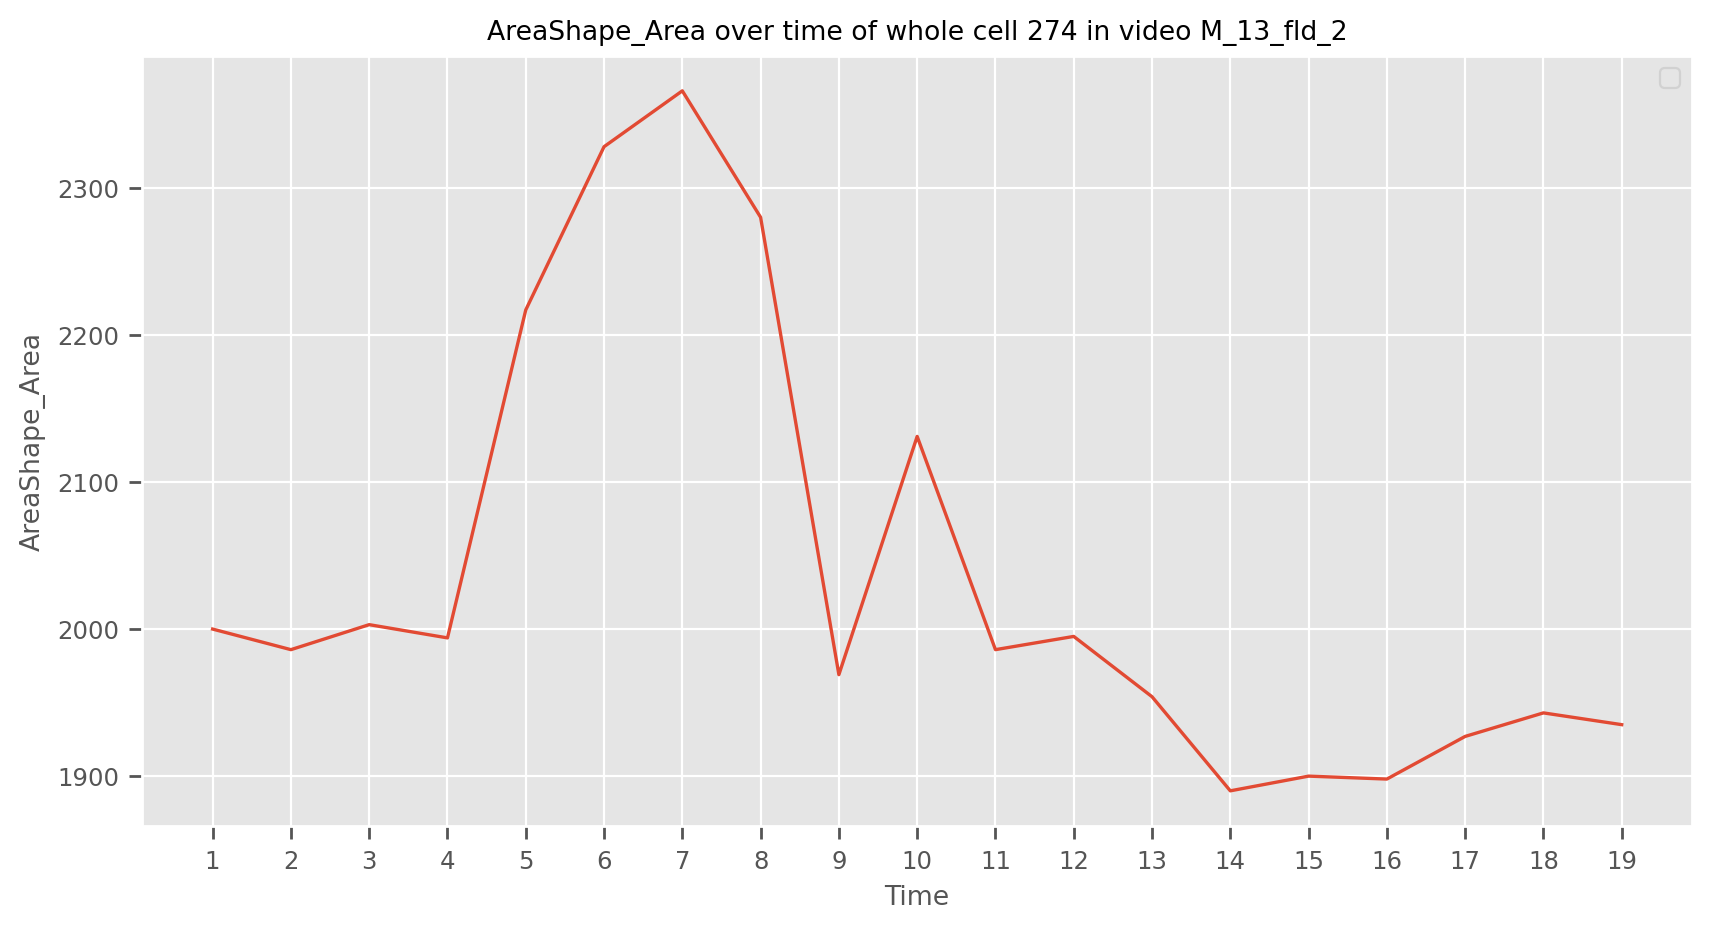

In [35]:
plt.figure(dpi=200, figsize=(10, 5))

plt.plot(df_this_vid_this_object[feature].reset_index(drop=True))
plt.xticks(
    ticks=range(len(df_this_vid_this_object)),
    labels=range(1, len(df_this_vid_this_object) + 1),
)
plt.title(f"{feature} over time of whole cell {int(float(object_number))} in video {video_id}")
plt.ylabel(f"{feature}")
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.show()

# Save timeseries of all features for all tracked objects

In [36]:
features_to_save = [feat for feat in df.columns if feat.startswith("AreaShape")]
features_to_save

['AreaShape_Area',
 'AreaShape_BoundingBoxArea',
 'AreaShape_BoundingBoxMaximum_X',
 'AreaShape_BoundingBoxMaximum_Y',
 'AreaShape_BoundingBoxMinimum_X',
 'AreaShape_BoundingBoxMinimum_Y',
 'AreaShape_Center_X',
 'AreaShape_Center_Y',
 'AreaShape_Compactness',
 'AreaShape_ConvexArea',
 'AreaShape_Eccentricity',
 'AreaShape_EquivalentDiameter',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5

In [37]:
list_dfs_to_concat: "list[pd.DataFrame]" = []


def process_object(object_id: str):
    df_this_object = df_full_lifetimes.query(f"global_object_id == '{object_id}'")
    features_this_object = []
    skip_this_object = False
    # run through all times
    for time in range(1, 20):
        df_this_time = df_this_object.query(f"Metadata_time == {time}")
        if len(df_this_time) > 1:
            skip_this_object = True
            break
        elif len(df_this_time) == 0:
            raise RuntimeError(
                f"Object {object_id} does not exist at time {time}; should have been filtered beforehand"
            )
        else:
            features_this_object_this_time = df_this_time[features_to_save].copy()
            features_this_object_this_time["global_object_id"] = object_id
            features_this_object_this_time["time"] = time
            features_this_object.append(features_this_object_this_time)
    # add this object if it's "simple": one "sub-object" per time
    if not skip_this_object:
        features_this_object = pd.concat(features_this_object, ignore_index=True)
        return features_this_object
    else:
        return None


with ProcessPoolExecutor() as executor:
    futures = {
        executor.submit(process_object, object_id): object_id
        for object_id in tqdm(
            df_full_lifetimes["global_object_id"].unique(), desc="Submitting tasks"
        )
    }
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing objects"):
        result = future.result()
        if result is not None:
            list_dfs_to_concat.append(result)


features_through_time = pd.concat(list_dfs_to_concat, ignore_index=True)
features_through_time

Submitting tasks:   0%|          | 0/45315 [00:00<?, ?it/s]

Processing objects:   0%|          | 0/45315 [00:00<?, ?it/s]

,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Compactness,AreaShape_ConvexArea,...,AreaShape_Zernike_8_4,AreaShape_Zernike_8_6,AreaShape_Zernike_8_8,AreaShape_Zernike_9_1,AreaShape_Zernike_9_3,AreaShape_Zernike_9_5,AreaShape_Zernike_9_7,AreaShape_Zernike_9_9,global_object_id,time
0,3393.0,4875.0,1406.0,111.0,1341.0,36.0,1372.483053,71.402594,2.289310,3813.0,...,0.009710,0.004410,0.003453,0.003183,0.000388,0.006655,0.002298,0.003536,B_13_fld_3-4.0,1
1,3528.0,5159.0,1418.0,124.0,1351.0,47.0,1383.251134,84.057540,2.267412,3986.0,...,0.007601,0.003255,0.001290,0.004256,0.001482,0.002464,0.003317,0.002131,B_13_fld_3-4.0,2
2,3309.0,4686.0,1425.0,124.0,1359.0,53.0,1388.664853,86.499547,2.158610,3752.0,...,0.005342,0.004963,0.004466,0.006873,0.002928,0.008095,0.003403,0.001627,B_13_fld_3-4.0,3
3,3087.0,4650.0,1428.0,124.0,1366.0,49.0,1395.878523,85.427276,2.758464,3573.0,...,0.006083,0.004228,0.004401,0.005503,0.007761,0.001869,0.002392,0.001268,B_13_fld_3-4.0,4
4,2165.0,3520.0,1429.0,117.0,1374.0,53.0,1400.663741,82.153811,1.969018,2412.0,...,0.011761,0.006565,0.001245,0.002615,0.008882,0.011065,0.000443,0.002017,B_13_fld_3-4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603872,2647.0,3450.0,641.0,1917.0,595.0,1842.0,619.349830,1880.440876,1.357668,2812.0,...,0.007615,0.002626,0.004097,0.005245,0.002689,0.006578,0.010161,0.003501,O_14_fld_4-397.0,15
603873,2648.0,3375.0,642.0,1914.0,597.0,1839.0,619.972810,1876.829683,1.339152,2798.0,...,0.004935,0.004567,0.001853,0.003185,0.006636,0.012366,0.005634,0.004998,O_14_fld_4-397.0,16
603874,2647.0,3225.0,642.0,1911.0,599.0,1836.0,620.592369,1872.743861,1.330435,2752.0,...,0.002107,0.005466,0.006591,0.004595,0.008154,0.008318,0.009199,0.004421,O_14_fld_4-397.0,17
603875,2648.0,3330.0,644.0,1909.0,599.0,1835.0,620.651057,1870.147281,1.307805,2752.0,...,0.003671,0.003871,0.008034,0.003946,0.004715,0.005746,0.008895,0.002499,O_14_fld_4-397.0,18


## Counts "simple" objects that were kept 

In [41]:
features_through_time["global_object_id"].nunique(dropna=False)

31783

versus the total number of objects:

In [42]:
df_full_lifetimes["global_object_id"].nunique(dropna=False)

45315

## Save

In [38]:
features_through_time.to_csv(
    data_path / "features_through_time_of_full_lifetime_simple_objects.csv", index=False
)